Preprocessing/Analysis (28 pts)

1) [9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.

In [16]:
import csv
import pandas as pd
import numpy as np
from pandas import Series
from pandas import DataFrame
from collections import defaultdict
from matplotlib import pyplot as plt
import random
def read_file():
    with open("EuCitiesTemperatures.csv",'r') as file_name:
        file_read = pd.read_csv(file_name)

    return file_read
print(read_file())

          city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no       NaN   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes       NaN   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08        15.18  
1         1.52          NaN  
2        11.41         4.54  
3          NaN         6.91

In [2]:
def replace_Nas():
    eu_df = read_file()
    eu_df2 = eu_df.copy()
    lat_mean = eu_df2["latitude"].mean()
    long_mean = eu_df2["longitude"].mean()
    eu_df2["latitude"] = eu_df2["latitude"].fillna(lat_mean) 
    eu_df2["longitude"] = eu_df2["longitude"].fillna(long_mean)
    return eu_df2
   

In [3]:
replace_Nas()

city         country  population   EU coastline   latitude  \
0      Elbasan         Albania        2.90   no       yes  41.120000   
1      Andorra         Andorra        0.07   no        no  42.500000   
2    Innsbruck         Austria        8.57  yes        no  47.358013   
3         Graz         Austria        8.57  yes        no  47.080000   
4         Linz         Austria        8.57  yes        no  48.320000   
..         ...             ...         ...  ...       ...        ...   
208  Edinburgh  United Kingdom       65.11  yes       yes  55.950000   
209     Exeter  United Kingdom       65.11  yes       yes  50.700000   
210  Inverness  United Kingdom       65.11  yes       yes  47.358013   
211    Glasgow  United Kingdom       65.11  yes       yes  55.870000   
212    Swansea  United Kingdom       65.11  yes       yes  51.630000   

     longitude  temperature  
0    20.080000        15.18  
1     1.520000          NaN  
2    11.410000         4.54  
3    15.671722         6.91  
4    14.290000         6.79  
..         ...          ...  
208  15.671722          NaN  
209  -3.530000        10.14  
210  -4.230000         8.00  
211  -4.250000         8.60  
212  -3.950000         9.73  

[213 rows x 8 columns]

2.[9 pts] Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [4]:
#class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]
def q2():
    df = read_file()
    df_subset = df[(df["latitude"] >= 40) & (df["latitude"] <= 60) & (df["longitude"] >= 15) & (df["longitude"] <= 30)]
    country_breakdown = df_subset["country"].value_counts()
    max_list = []
    i = 0
    while country_breakdown[i] == country_breakdown[0]:
        
        max_list.append(country_breakdown[i])
        i+=1
    country_breakdown2 = df_subset["country"].value_counts()[:len(max_list)].index.tolist()
    #dataframe['name'].value_counts()[:n].index.tolist()

    return country_breakdown2

In [5]:
q2()

['Poland', 'Romania']

3. [10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).
For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will fill it with the average temperature of cities with EU='no' and coastline='yes')

In [6]:
#print(df.groupby(['A','B']).mean().reset_index())
#df.loc[df.a==1,'b'] = df.loc[df.a==1,'b'].fillna(df[df['a']==1]['b'].median())
def avg_region_temp():
    df = read_file()
    
    df_grouping = df.groupby(['EU','coastline']).mean().reset_index()
    #print(df_grouping)

        
    df.loc[(df['EU'] == 'no') & (df['coastline'] == 'no'),"temperature"] = df.loc[(df['EU'] == 'no') & (df['coastline'] == 'no'),'temperature'].fillna(df_grouping["temperature"][0])
    #print(df.loc[(df['EU'] == 'no') & (df['coastline'] == 'no')])
    df.loc[(df['EU'] == 'no') & (df['coastline'] == 'yes'),'temperature'] = df.loc[(df['EU'] == 'no') & (df['coastline'] == 'yes'),'temperature'].fillna(df_grouping["temperature"][1])
    df.loc[(df['EU'] == 'yes') & (df['coastline'] == 'no'),'temperature'] = df.loc[(df['EU'] == 'yes') & (df['coastline'] == 'no'),'temperature'].fillna(df_grouping["temperature"][2])
    df.loc[(df['EU'] == 'yes') & (df['coastline'] == 'yes'),'temperature'] = df.loc[(df['EU'] == 'yes') & (df['coastline'] == 'yes'),'temperature'].fillna(df_grouping["temperature"][3])

        #Consider scrapping the groupby idea and instead just using .fillna on mean of the subset
    #pd.set_option("display.max_rows", None, "display.max_columns", None)
    #pd.reset_option('^display.', silent=True)
    return df

In [7]:
avg_region_temp()

city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no       NaN   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes       NaN   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08    15.180000  
1         1.52     7.481538  
2        11.41     4.540000  
3          NaN     6.910000  
4        14.29     6.790000  
..         ...          ...  
208        NaN    10.314494  
209      -3.53    10.140000  
210      -4.23     8.000000  
211      -4.25     8.600000  
212      -3.95     9.730000  

[213 rows x 8 columns]

Visualization (27 pts)


1. [6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

In [8]:
def city_bar():
    df = read_file()
    df_grouping = df.groupby(['EU','coastline'])['city'].count()
    #city_breakdown = df["city"].value_counts()
    return df_grouping.plot.bar()

<AxesSubplot:xlabel='EU,coastline'>

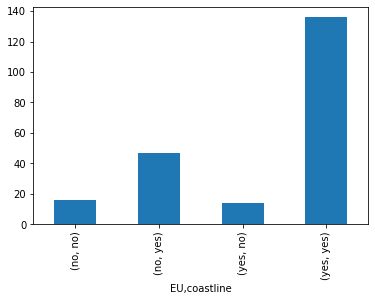

In [9]:
city_bar()

2.[7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

In [10]:
def scat():#Answer in Nov 16 Notebook
    df = read_file()
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(10,10)
    countries = df["country"].unique()
    print(len(countries))
    colors = []
    for i in range(len(countries)):
        r = random.uniform(0,1)
        g = random.uniform(0,1)
        b = random.uniform(0,1)
        rgb = (r,g,b)
        colors.append(rgb)
    #print(colors)
    for countries,color in zip(countries,colors):
        d = df[df['country'] == countries]    
        d.plot('longitude','latitude',ax=ax,kind='scatter',color=color,label=countries)


37


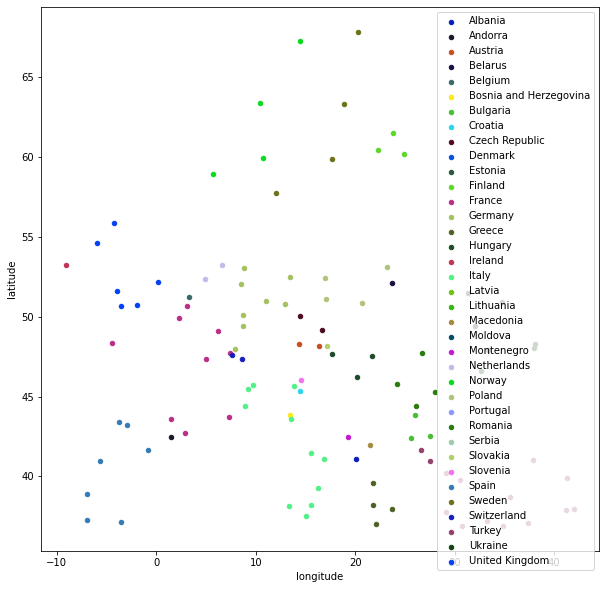

In [11]:
scat() 

3. [6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

In [12]:
def pop_group():
    df = read_file()
    max_score = df['population'].max()
    if max_score % 5 == 0:
        upper = max_score
    else:
        upper = max_score - max_score % 5 + 5
    print(max_score)
    print(upper)
    plt.hist(df['population'],bins=range(0,int(upper+1),int((upper+1)/5)),color='#bffa45',edgecolor='green')
    plt.xticks(range(0,int(upper+1),int((upper+1)/5)))
    plt.show()
    

80.68
85.0


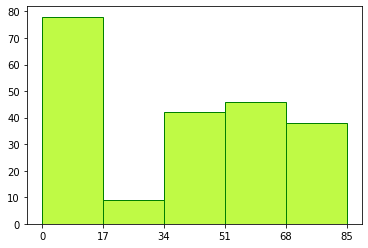

In [13]:
pop_group()

4.[8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.
Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.

In [14]:
def subp():
    df = read_file()
    df.plot(kind='scatter',x='city',y='latitude',alpha=0.4,
             s=df['population']/5,label='population',
             figsize=(5,3),c='temperature',
             cmap=plt.get_cmap('jet'),colorbar=True)

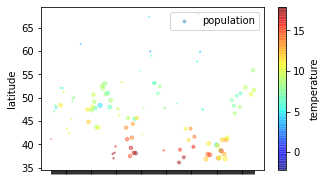

In [15]:
subp()